<!-- K_E -->

In [40]:
from neuron import h
from neuron.units import ms, mV
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import plotly
from neuron import clear_gui_callback
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
from scipy.integrate import cumtrapz
from numpy.linalg import pinv, eig
import numpy as np
h.load_file("stdrun.hoc")
from multiprocessing import Pool
font2={'family':'Times New Roman',
'weight':'bold',
'size': 12}

from matplotlib.ticker import FuncFormatter
def format_func(value, tick_number):
    return f'{value:.0f}'  # 将刻度值格式化为小数点后两位

def plot_curve(ax2,x,y,z, cmap='coolwarm',title='', linestyle='-',xlim=[0,100],dx=20,
               ylim=[0,10],dy=5.0, fontsize=10, alpha = 1.0, xlabel='Time/ms', zlabel='',
               ylabel = 'Frequency/Hz', label='',ynum_decimals =1,xnum_decimals =1, zlim=[0,100],dz=20,
               nonscatter=True, s0=10, nondoubley=True, plottype = 'scatter', color='b'):
    if plottype=='scatter':
        surf = ax2.scatter(x, y, s=s0, alpha=0.7, edgecolor='w', marker='*')
    if plottype=='trisurf':
        surf = ax2.plot_trisurf(x, y, z, cmap=cmap, edgecolor='none', alpha=0.8)
    if plottype=='line':
        surf = ax2.plot(x, y, linestyle=linestyle, alpha=alpha, label=label, color=color)
        
    ax2.set_xlabel(xlabel,font2)
    ax2.set_ylabel(ylabel,font2)

    
    def format_funcx(value, tick_number, num_decimals=xnum_decimals):
        if num_decimals==0:
            return f'{value:.0f}'
        return f'{value:.{num_decimals}f}'

    def format_funcy(value, tick_number, num_decimals=ynum_decimals):
        if num_decimals==0:
          return f'{value:.0f}'
        return f'{value:.{num_decimals}f}'

    # if dx:
    #     ax2.set_xticks(np.arange(xlim[0], xlim[1] + dx, dx))
    #     ax2.set_xticklabels(ax2.get_xticks(), fontsize=fontsize, weight='bold')
    #     ax2.set_xlim([xlim[0], xlim[1]])
    #     ax2.xaxis.set_major_formatter(FuncFormatter(format_funcx))

    if dy:
        ax2.set_yticks(np.arange(ylim[0], ylim[1] + dy, dy))
        ax2.set_yticklabels(ax2.get_yticks(), fontsize=fontsize, weight='bold')
        ax2.set_ylim([ylim[0], ylim[1]])
        ax2.yaxis.set_major_formatter(FuncFormatter(format_funcy))
        
  
    if dx:
       ax2.set_xticks(np.arange(xlim[0],xlim[1]+dx,dx))
       ax2.set_xticklabels(np.arange(xlim[0],xlim[1]+dx,dx),fontsize=fontsize,weight='bold')
       ax2.set_xlim(xlim)
       ax2.xaxis.set_major_formatter(FuncFormatter(format_funcx))
       
    if dz:
       ax2.set_zticks(np.arange(zlim[0],zlim[1]+dz,dz))
       ax2.set_zticklabels(np.arange(zlim[0],zlim[1]+dz,dz),fontsize=fontsize,weight='bold')
       ax2.set_zlim(zlim)
       ax2.zaxis.set_major_formatter(FuncFormatter(format_funcx))
       ax2.set_zlabel(zlabel,font2)
    # if ylim:
    #    ax2.set_yticks(np.arange(ylim[0],ylim[1]+dy,dy))
    #    ax2.set_yticklabels(np.arange(ylim[0],ylim[1]+dy,dy),fontsize=10,weight='bold')
    #    ax2.set_ylim(ylim)
    if title:
       ax2.set_title('{0}'.format(title),fontsize=12,weight='bold')
    ax2.spines['top'].set_visible(False)
    if nondoubley:
        ax2.spines['right'].set_visible(False)
    if label:
       ax2.legend(loc='best',prop=font2,edgecolor='white')
    # ax2.grid(False)
    return surf

findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.
findfont: Font family 'Times New Roman' not found.


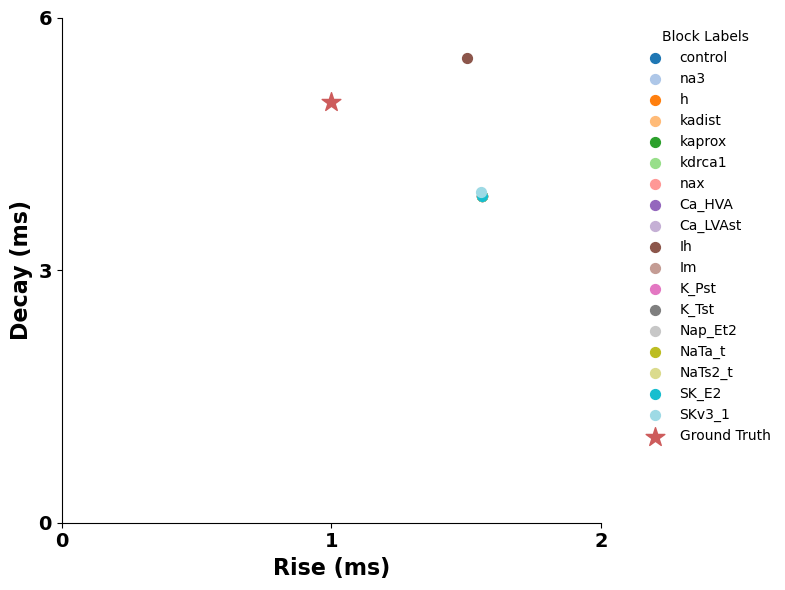

In [59]:
import numpy as np
import matplotlib.pyplot as plt
font2={'family':'Times New Roman',
'weight':'bold',
'size': 16}

estimated_time_constant = np.loadtxt('/home/wzl/LFPy/project/conductance_measurement/realistic_neuron/L5PC_neuron/active_block_ion_dend67_fE1e3.txt')
estimated_time_constant = -1. / estimated_time_constant  # 计算转换

# 定义 block labels
block = ['control','na3', 'h', 'kadist', 'kaprox', 'kdrca1', 'nax', 'Ca_HVA', 'Ca_LVAst', 'Ih', 'Im',
         'K_Pst', 'K_Tst', 'Nap_Et2', 'NaTa_t', 'NaTs2_t', 'SK_E2', 'SKv3_1']

# 颜色映射
num_labels = len(block)
# colors = plt.cm.get_cmap('pastel1', num_labels)  # 使用 tab10 颜色映射
colors = plt.cm.tab20(np.linspace(0, 1, num_labels))  # 离散的颜色

# 创建散点图
fig, ax = plt.subplots(figsize=(8, 6))
ground_truth = [1.0, 5.0]
plot_curve(ax,ground_truth[0], ground_truth[1], [], cmap='coolwarm',title='', linestyle='-',xlim=[0,2],dx=1,
               ylim=[0,6], dy=3, fontsize=14, alpha = 1.0, xlabel='Rise (ms)', zlabel='',
               ylabel = 'Decay (ms)', label='',ynum_decimals =0,xnum_decimals =0
               , zlim=[0,100],dz=0,
               nonscatter=True, s0=10, nondoubley=True, plottype = 'scatter', color='darkred')

# 遍历数据点，根据 block 分类绘制
for i in range(num_labels):
    ax.scatter(estimated_time_constant[i, 0], estimated_time_constant[i, 1], 
               color=colors[i], label=block[i], s=50, alpha = 1.0)  # s 调整点的大小

# 在 (1.0, 5.0) 位置添加 ground truth 星星标记
ground_truth = [1.0, 5.0]
ax.scatter(ground_truth[0], ground_truth[1], color='indianred', marker='*', s=200, label="Ground Truth")

ax.legend(title="Block Labels", bbox_to_anchor=(1.05, 1), loc='upper left', frameon=False)


# # 设置轴标签和标题
# ax.set_xlabel("Rise (ms)")
# ax.set_ylabel("Decay (ms)")
# ax.set_title("Scatter Plot of Estimated Time Constants")

# 调整布局以适应图例
plt.tight_layout()

# 显示图像
plt.show()


In [47]:

rounded_values = np.round(estimated_time_constant[:, 1], 2)

# 输出
print(rounded_values)


[3.88 3.88 3.88 3.88 3.88 3.88 3.88 3.88 3.88 5.52 3.88 3.88 3.88 3.88
 3.88 3.88 3.88 3.92]


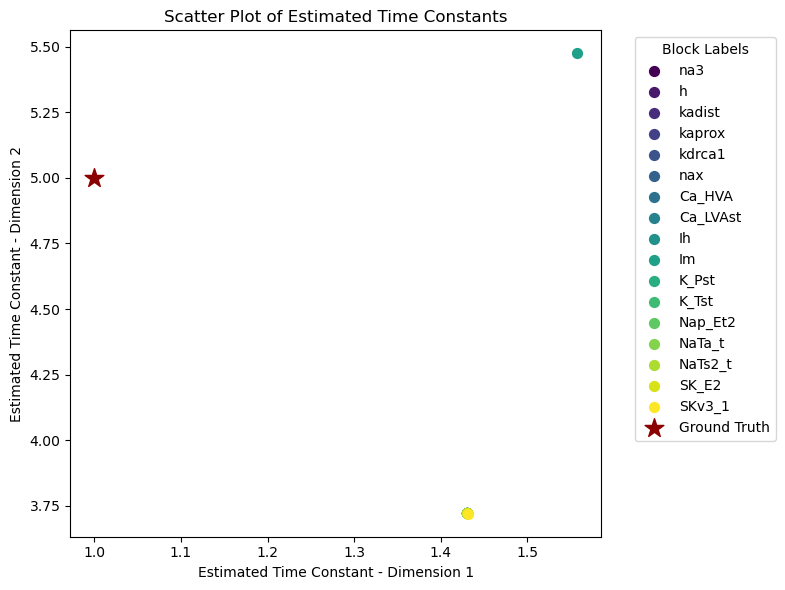

In [32]:
import numpy as np
import matplotlib.pyplot as plt

# 读取数据
estimated_time_constant = np.loadtxt('/home/wzl/LFPy/project/conductance_measurement/realistic_neuron/L5PC_neuron/active_block_ion_fE1e3.txt')
estimated_time_constant = -1. / estimated_time_constant  # 计算转换

# 定义 block labels
block = ['na3', 'h', 'kadist', 'kaprox', 'kdrca1', 'nax', 'Ca_HVA', 'Ca_LVAst', 'Ih', 'Im',
         'K_Pst', 'K_Tst', 'Nap_Et2', 'NaTa_t', 'NaTs2_t', 'SK_E2', 'SKv3_1']

# 颜色映射使用 'viridis' 方案
num_labels = len(block)
colors = plt.cm.viridis(np.linspace(0, 1, num_labels))  # 使用 viridis 颜色映射

# 创建散点图
fig, ax = plt.subplots(figsize=(8, 6))

# 遍历数据点，根据 block 分类绘制
for i in range(num_labels):
    ax.scatter(estimated_time_constant[i, 0], estimated_time_constant[i, 1], 
               color=colors[i], label=block[i], s=50)  # s 调整点的大小

# 在 (1.0, 5.0) 位置添加 ground truth 星星标记
ground_truth = [1.0, 5.0]
ax.scatter(ground_truth[0], ground_truth[1], color='darkred', marker='*', s=200, label="Ground Truth")

# 添加图例
ax.legend(title="Block Labels", bbox_to_anchor=(1.05, 1), loc='upper left')

# 设置轴标签和标题
ax.set_xlabel("Estimated Time Constant - Dimension 1")
ax.set_ylabel("Estimated Time Constant - Dimension 2")
ax.set_title("Scatter Plot of Estimated Time Constants")

# 调整布局以适应图例
plt.tight_layout()

# 显示图像
plt.show()


# $K_E$